In [1]:
# Imporing necessary modules for project 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as dt
import scipy as sp
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.svm import SVC
import joblib as jb
from collections import Counter

# loading the dataet
df = pd.read_csv('dataset.csv')


In [2]:
# crating independent and dependant variables.
X=df.drop(columns=['Response Id','Personality'])
y=df['Personality']

In [3]:
# Taking a look at the dataset
print(df)

       Response Id  You regularly make new friends  \
0                0                               0   
1                1                               0   
2                2                               0   
3                3                               0   
4                4                               0   
...            ...                             ...   
59994        59994                               0   
59995        59995                               0   
59996        59996                               0   
59997        59997                               0   
59998        59998                               0   

       You spend a lot of your free time exploring various random topics that pique your interest  \
0                                                      0                                            
1                                                      0                                            
2                                               

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                               --------------  ----- 
 0   Response Id                                                                                                          59999 non-null  int64 
 1   You regularly make new friends                                                                                       59999 non-null  int64 
 2   You spend a lot of your free time exploring various random topics that pique your interest                           59999 non-null  int64 
 3   Seeing other people cry can easily make you feel like you want to cry too                                            59999 non-null  int64 
 4   You often make a

In [5]:
# Diving deep into the statistics of the data
df.describe()

,Response Id,You regularly make new friends,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan,You usually stay calm even under a lot of pressure,At social events you rarely try to introduce yourself to new people and mostly talk to the ones you already know,You prefer to completely finish one project before starting another,You are very sentimental,You like to use organizing tools like schedules and lists,...,You would love a job that requires you to work alone most of the time,You believe that pondering abstract philosophical questions is a waste of time,You feel more drawn to places with busy bustling atmospheres than quiet intimate places,You know at first glance how someone is feeling,You often feel overwhelmed,You complete things methodically without skipping over any steps,You are very intrigued by things labeled as controversial,You would pass along a good opportunity if you thought someone else needed it more,You struggle with deadlines,You feel confident that things will work out for you
count,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,...,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000
mean,29999.000000,-0.000867,-0.000467,0.000267,-0.232887,-0.175653,0.005317,-0.476558,-0.000550,0.126819,...,0.001233,0.000133,0.115869,-0.002167,0.240687,-0.000533,0.000667,0.125152,0.001983,0.118202
std,17320.363738,0.365701,0.364652,1.527343,1.502173,1.502999,1.521413,1.445931,0.367361,1.537329,...,0.365517,0.367611,1.526440,0.366515,1.498320,0.364606,0.368426,1.515761,1.524584,1.542457
min,0.000000,-2.000000,-1.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-1.000000,-3.000000,...,-1.000000,-1.000000,-3.000000,-1.000000,-3.000000,-1.000000,-2.000000,-3.000000,-3.000000,-3.000000
25%,14999.500000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000,0.000000,-1.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
50%,29999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44998.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,59998.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,...,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000


([<matplotlib.axis.XTick at 0x76867e953320>,
 [Text(0.0, 0, 'ENFP'),
  Text(1.0, 0, 'ISFP'),
  Text(2.0, 0, 'INFJ'),
  Text(3.0, 0, 'ISTP'),
  Text(4.0, 0, 'ENFJ'),
  Text(5.0, 0, 'INTJ'),
  Text(6.0, 0, 'ENTJ'),
  Text(7.0, 0, 'ESFP'),
  Text(8.0, 0, 'INFP'),
  Text(9.0, 0, 'INTP'),
  Text(10.0, 0, 'ISTJ'),
  Text(11.0, 0, 'ENTP'),
  Text(12.0, 0, 'ISFJ'),
  Text(13.0, 0, 'ESTJ'),
  Text(14.0, 0, 'ESTP'),
  Text(15.0, 0, 'ESFJ')])

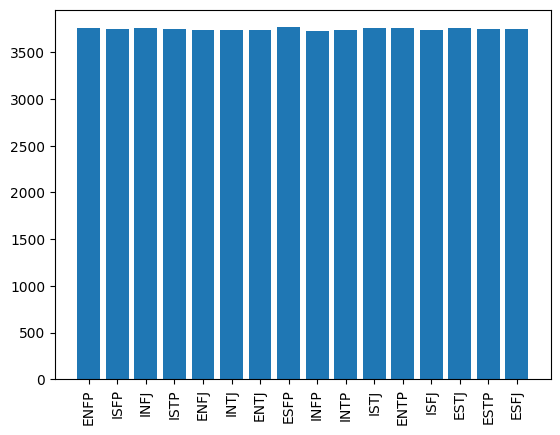

In [6]:
# Checking imbalance in classes
value_counts = Counter(df['Personality'])
counts = value_counts.values()
labels = value_counts.keys()
plt.bar(labels,counts,width=0.8)
plt.xticks(list(value_counts.keys()),rotation = 90)

In [3]:
# Now that the dataset is balanced we proceed to train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=22)

In [8]:
# Testing the performance of various random forest classifier models
max_depths = [None,20,50,100]
n_estimators = [10,50,100,150,250]
for max_depth in max_depths:
    for estimators in n_estimators:
        rfc_model = rfc(max_depth=max_depth,n_estimators = estimators,n_jobs=-1)
        rfc_model.fit(X_train,y_train)
        y_pred=rfc_model.predict(X_test)
        print(f'depth : {max_depth}  estimators : {estimators}')
        print("accuracy:",metrics.classification_report(y_test,y_pred))

best_rfc  = rfc(max_depth=None,n_estimators=150)

depth : None  estimators : 10
accuracy:               precision    recall  f1-score   support

        ENFJ       0.84      0.94      0.88      1100
        ENFP       0.85      0.94      0.89      1096
        ENTJ       0.87      0.94      0.90      1082
        ENTP       0.88      0.91      0.90      1128
        ESFJ       0.88      0.87      0.88      1182
        ESFP       0.90      0.90      0.90      1158
        ESTJ       0.87      0.90      0.89      1085
        ESTP       0.91      0.90      0.91      1127
        INFJ       0.89      0.89      0.89      1134
        INFP       0.91      0.91      0.91      1128
        INTJ       0.89      0.87      0.88      1123
        INTP       0.92      0.88      0.90      1131
        ISFJ       0.93      0.84      0.88      1131
        ISFP       0.93      0.84      0.89      1149
        ISTJ       0.92      0.87      0.90      1127
        ISTP       0.92      0.89      0.90      1119

    accuracy                           0

KeyboardInterrupt: 

In [ ]:
# Testing the performance of various decision tree classifier models
criteria = ['gini', 'entropy', 'log_loss']
max_depths = [50,100,150,200,250]        
for criterion in criteria:
    for max_depth in max_depths:
        dtree_model = dt(max_depth=max_depth,criterion=criterion)
        dtree_model.fit(X_train,y_train)
        y_pred=dtree_model.predict(X_test)
        print(f'criterion  : {criterion}  depth : {max_depth}')
        print(metrics.accuracy_score(y_test,y_pred))

In [ ]:
# Testing the performance of various k-nearest-neighbors classifier models
neighbors = [5,50,200,500]
for neighbor in neighbors:
    knn_model = knn(n_neighbors=neighbor,n_jobs=-1)
    knn_model.fit(X_train,y_train)
    y_pred = knn_model.predict(X_test)
    print(f'neighbors  : {neighbor} ')
    print('Accuracy  score:', metrics.accuracy_score(y_test,y_pred))

In [ ]:
# Testing the performance of various support vector classifier models
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
gammas = [0.01,0.5,1,5]
cees = [0.001,0.01,0.5]
degrees = [2,3]
for c in cees:
    for kernel in kernels:
        if kernel == 'poly':
            for degree in degrees:
                svc = SVC(C=c,kernel=kernel,degree=degree)
                svc.fit(X_train,y_train)
                y_preds = svc.predict(X_test)
                print(f'c:{c} , kernel:{kernel} , degree:{degree}')
                print(metrics.accuracy_score(y_test,y_preds))
        

        elif kernel == 'linear':
            svc = SVC(C=c,kernel=kernel)
            svc.fit(X_train,y_train)
            y_preds = svc.predict(X_test)
            print(f'c:{c} , kernel:{kernel}')
            print(metrics.accuracy_score(y_test,y_preds))


        else:
            for gamma in gammas:
                svc = SVC(C=c,kernel=kernel,gamma=gamma)
                svc.fit(X_train,y_train)
                y_preds = svc.predict(X_test)
                print(f'c:{c} , kernel:{kernel} , gamma:{gamma}')
                print(metrics.accuracy_score(y_test,y_preds))


In [7]:
best_model = knn(n_neighbors=50)
best_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [8]:
# K Fold for the best model from our analysis
kf = KFold(n_splits=6, shuffle=True, random_state=22)
cross_val_knn = cross_val_score(best_model,X,y,cv=kf,n_jobs=-1)

print(f'knn:{cross_val_knn}, mean {cross_val_knn.mean()}')

knn:[0.9892    0.9892    0.9891    0.9889    0.9905    0.9889989], mean 0.9893164833149982


In [9]:
y_pred = best_model.predict(X_test)
print('Accuracy  score:', metrics.classification_report(y_test,y_pred))

Accuracy  score:               precision    recall  f1-score   support

        ENFJ       0.98      1.00      0.99      1100
        ENFP       0.99      0.99      0.99      1096
        ENTJ       0.99      0.99      0.99      1082
        ENTP       0.99      0.99      0.99      1128
        ESFJ       0.99      0.98      0.99      1182
        ESFP       0.99      0.98      0.99      1158
        ESTJ       0.99      0.99      0.99      1085
        ESTP       0.99      0.99      0.99      1127
        INFJ       0.99      0.99      0.99      1134
        INFP       0.99      0.99      0.99      1128
        INTJ       0.99      0.99      0.99      1123
        INTP       0.99      0.98      0.99      1131
        ISFJ       0.99      0.99      0.99      1131
        ISFP       0.99      0.99      0.99      1149
        ISTJ       0.99      0.99      0.99      1127
        ISTP       0.99      0.99      0.99      1119

    accuracy                           0.99     18000
   macro 

In [12]:
# Now that the model is now tested well we can save the model using joblib
model_name = 'personality_model.sav'
jb.dump(best_model,model_name)

['personality_model.sav']

In [ ]:
data_features = [
"You regularly make new friends",
"You spend a lot of your free time exploring various random topics that pique your interest",
"Seeing other people cry can easily make you feel like you want to cry too",
"You often make a backup plan for a backup plan",
"You usually stay calm, even under a lot of pressure",
"At social events you rarely try to introduce yourself to new people and mostly talk to the ones you already know",
"You prefer to completely finish one project before starting another",
"You are very sentimental",
"You like to use organizing tools like schedules and lists",
"Even a small mistake can cause you to doubt your overall abilities and knowledge",
"You feel comfortable just walking up to someone you find interesting and striking up a conversation",
"You are not too interested in discussing various interpretations and analyses of creative works",
"You are more inclined to follow your head than your heart",
"You usually prefer just doing what you feel like at any given moment, instead of planning a particular daily routine",
"You rarely worry about whether you make a good impression on people you meet",
"You enjoy participating in group activities",
"You like books and movies that make you come up with your own interpretation of the ending",
"Your happiness comes more from helping others accomplish things than your own accomplishments",
"You are interested in so many things, that you find it difficult to choose what to try next",
"You are prone to worrying that things will take a turn for the worse",
"You avoid leadership roles in group settings",
"You are definitely not an artistic type of person",
"You think the world would be a better place if people relied more on rationality and less on their feelings",
"You prefer to do your chores before allowing yourself to relax",
"You enjoy watching people argue",
"You tend to avoid drawing attention to yourself",
"Your mood can change very quickly",
"You lose patience with people who are not as efficient as you",
"You often end up doing things at the last possible moment",
"You have always been fascinated by the question of, what if anything happens after death",
"You usually prefer to be around others rather than on your own",
"You become bored or lose interest when the discussion gets highly theoretical",
"You find it easy to empathize with a person whose experiences are very different from yours",
"You usually postpone finalizing decisions for as long as possible",
"You rarely second-guess the choices that you have made",
"After a long and exhausting week a lively social event is just what you need",
"You enjoy going to art museums",
"You often have a hard time understanding other people’s feelings",
"You like to have a to-do list for each day",
"You rarely feel insecure",
"You avoid making phone calls",
"You often spend a lot of time trying to understand views that are very different from your own",
"In your social circle you are often the one who contacts your friends and initiates activities",
"If your plans are interrupted, your top priority is to get back on track as soon as possible",
"You are still bothered by mistakes that you made a long time ago",
"You rarely contemplate the reasons for human existence or the meaning of life",
"Your emotions control you more than you control them",
"You take great care not to make people look bad even when it is completely their fault",
"Your personal work style is closer to spontaneous bursts of energy than organized and consistent efforts",
"When someone thinks highly of you, you wonder how long it will take them to feel disappointed in you",
"You would love a job that requires you to work alone most of the time",
"You believe that pondering abstract philosophical questions is a waste of time",
"You feel more drawn to places with busy bustling atmospheres than quiet intimate places",
"You know at first glance how someone is feeling",
"You often feel overwhelmed",
"You complete things methodically without skipping over any steps",
"You are very intrigued by things labeled as controversial",
"You would pass along a good opportunity if you thought someone else needed it more",
"You struggle with deadlines",
"You feel confident that things will work out for you",
]